# Comportamiento del precio de las acciones "AMERICA MOVIL SAB DE CV (claro) " utilizando API de Yahoo
 Metodología Forecasting acciones Empresa Claro

Se intenta predecir el comportamiento de precios, de la accion (AMERICA MOVIL SAB DE CV (AMXVF)) empresa dedicada a la industria de telecomunicaciones, , donde se utilizará la API de Yahoo Finance

## Obtección de data 

Se extraera la data del sito web yahoo, mediante acceso API

Primero hay que instalar el SDK del sitio web

pip install yahoo-finance-api2 o 
pip install yfinance

In [5]:
# importar librerias 
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import sktime
from sktime.utils.plotting import plot_series
# !pip install sktime[all_extras]

#import librerias de Yahoo Finance
import datetime as dt
import yfinance as yf

In [6]:
# importar data 

#defirnir la etiqueta compañia 
company = 'AMXVF'

# Define a start date and End Date
start = dt.datetime(2014,1,5)  
end =  dt.datetime(2023,2,8)

# Cargara data, si no se incluyen los parametros "start y end" se obtiene toda la data disponible

df = yf.download(company, start, end)
df.shape

[*********************100%***********************]  1 of 1 completed


(2289, 6)

In [7]:
# Mostrar los datos
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-01-06 00:00:00-05:00,1.16,1.16,1.16,1.16,1.096783,3200
2014-01-07 00:00:00-05:00,1.10,1.10,1.10,1.10,1.040053,3000
2014-01-08 00:00:00-05:00,1.10,1.10,1.10,1.10,1.040053,0
2014-01-09 00:00:00-05:00,1.10,1.10,1.10,1.10,1.040053,0
2014-01-10 00:00:00-05:00,1.10,1.10,1.10,1.10,1.040053,0
...,...,...,...,...,...,...
2023-02-01 00:00:00-05:00,1.04,1.04,1.04,1.04,1.040000,1100
2023-02-02 00:00:00-05:00,1.04,1.04,1.04,1.04,1.040000,0
2023-02-03 00:00:00-05:00,1.04,1.04,1.04,1.04,1.040000,0


# Predicción de la serie temporal 

Se utilizará el metodo de PyCaret

Esta librería trabaja con pandas series 

In [8]:
# import librerias 
#!pip install pycaret[full]
from pycaret.internal.pycaret_experiment import TimeSeriesExperiment

In [9]:
# Se crea la variable "idex", la cual contiene la fecha 
index= pd.DatetimeIndex(df.index)

#Seleccionar la columna a evaluar y se transforma a serie de numpy
data= df['Close'].to_numpy()

# se crea la serie temporal donde se especifica la variable y la fecha 
df_serie= pd.Series(data= data, index=index, )

In [10]:
# Mostrar las serie
df_serie

Date
2014-01-06 00:00:00-05:00    1.16
2014-01-07 00:00:00-05:00    1.10
2014-01-08 00:00:00-05:00    1.10
2014-01-09 00:00:00-05:00    1.10
2014-01-10 00:00:00-05:00    1.10
                             ... 
2023-02-01 00:00:00-05:00    1.04
2023-02-02 00:00:00-05:00    1.04
2023-02-03 00:00:00-05:00    1.04
2023-02-06 00:00:00-05:00    1.04
2023-02-07 00:00:00-05:00    0.99
Length: 2289, dtype: float64

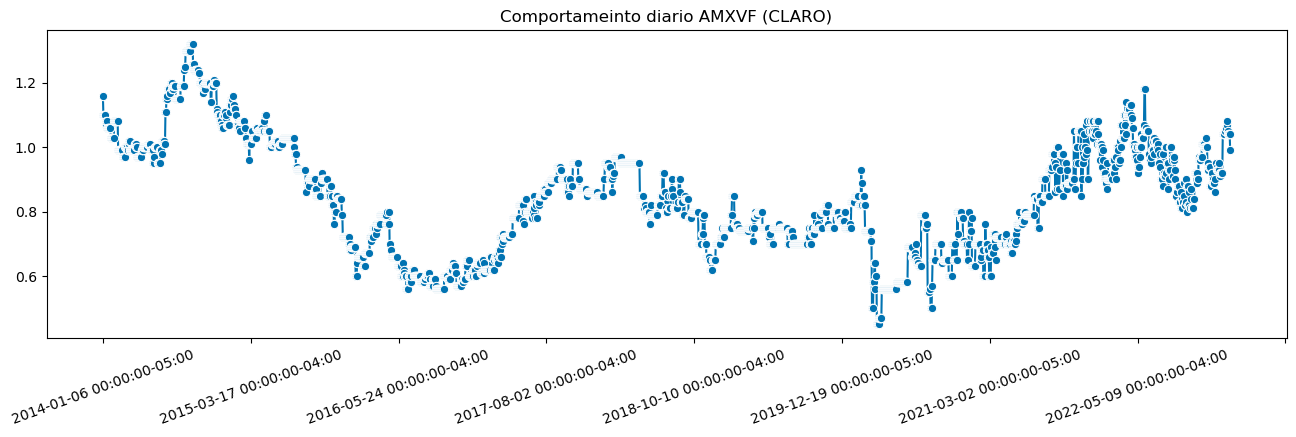

In [11]:
# garaficar la serie 
from sktime.utils.plotting import plot_series 

fig, ax= plot_series(df_serie)
ax.tick_params(axis='x', rotation=20)
plt.title("Comportameinto diario AMXVF (CLARO)")
plt.show()

Utiluzando la librería pandas, se hace un "resample" Cambiando la periodicidad de diario a semanal, con esto visualizando de mejor manera la data 

In [12]:
# resample, se promedian los semana
df_serie_semana= df_serie.resample('W').mean()

Text(0.5, 1.0, 'Comportameinto semanal AMXVF (CLARO)')

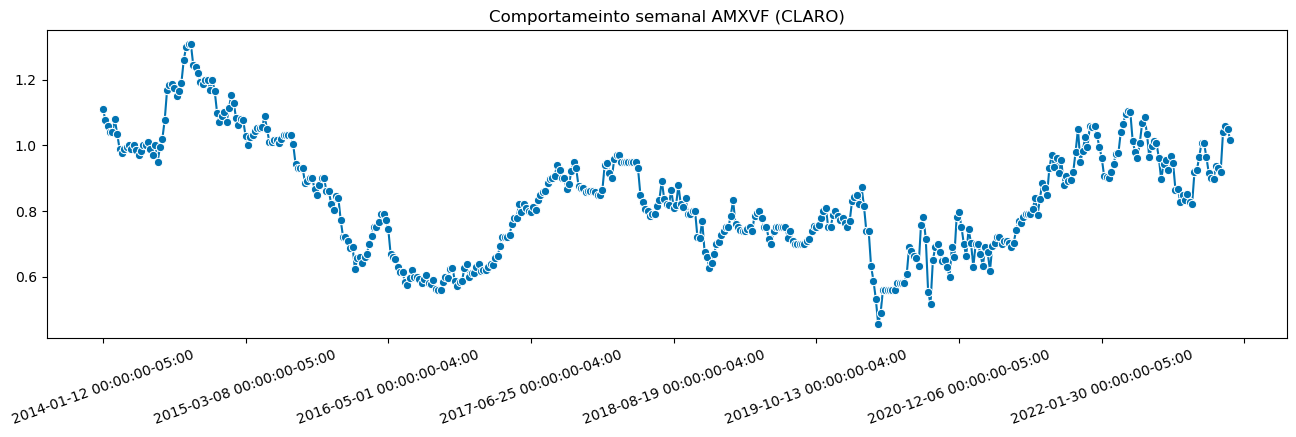

In [13]:
fig, ax= plot_series(df_serie_semana)
ax.tick_params(axis='x', rotation=20)
plt.title("Comportameinto semanal AMXVF (CLARO)")

# Diseñar experimento 

En este apartado se diseña el experimento utiizando el framework pycaret

In [14]:
# init setup
from pycaret.time_series import *

# crear el experiemento, donde el parametro fh es e horizonte de forcasting 
exp = setup(data= df_serie_semana, fh=20, session_id=100, use_gpu=True)

,Description,Value
0,session_id,100
1,Target,Time Series
2,Approach,Univariate
3,Exogenous Variables,Not Present
4,Original data shape,"(475, 1)"
5,Transformed data shape,"(475, 1)"
6,Transformed train set shape,"(455, 1)"
7,Transformed test set shape,"(20, 1)"
8,Rows with missing values,0.0%
9,Fold Generator,ExpandingWindowSplitter


In [ ]:
# comparación de modelos, se seleccionarán los 3 modelos con mejor (MEDIAN ABSOLUTE ERROR)  "MAE"
#con el parametro "n_select = 3" guardo los 3 mejores modelos
best_baseline = exp.compare_models(n_select= 3, sort="MAE")

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,08:14:32
Status,. . . . . . . . . . . . . . . . . .,Fitting 3 Folds
Estimator,. . . . . . . . . . . . . . . . . .,Auto ARIMA


,Model,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2,TT (Sec)
naive,Naive Forecaster,0.3372,0.3121,0.0720,0.0839,0.0748,0.0766,-1.2621,0.0233
arima,ARIMA,0.6492,0.5852,0.1372,0.1558,0.1393,0.1568,-7.1122,15.9633
grand_means,Grand Means Forecaster,0.6849,0.5933,0.1459,0.1590,0.1468,0.1607,-5.6460,0.0300
snaive,Seasonal Naive Forecaster,1.3130,1.0816,0.2801,0.2898,0.2866,0.3454,-20.9352,0.0233
polytrend,Polynomial Trend Forecaster,1.4000,1.1382,0.2983,0.3051,0.3055,0.3635,-24.9947,0.0267


Processing:   0%|          | 0/127 [00:00<?, ?it/s]

### Se entrenan los parametros de los mejores 3 modeos

In [ ]:
# Best_tuned_models = [exp.tune_model(model) for model in best_baseline]

,cutoff,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
0,"PeriodIndex(['2021-07-26/2021-08-01'], dtype='period[W-SUN]')",0.3790,0.3418,0.0806,0.0919,0.0841,0.0888,-2.1419
1,"PeriodIndex(['2021-12-13/2021-12-19'], dtype='period[W-SUN]')",0.3021,0.3062,0.0632,0.0807,0.0609,0.0636,-0.4756
2,"PeriodIndex(['2022-05-02/2022-05-08'], dtype='period[W-SUN]')",0.2036,0.2085,0.0447,0.0570,0.0468,0.0472,0.3182
Mean,nan,0.2949,0.2855,0.0628,0.0765,0.0639,0.0665,-0.7665
SD,nan,0.0718,0.0564,0.0147,0.0145,0.0154,0.0171,1.0252


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   14.0s finished


,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,15:24:37
Status,. . . . . . . . . . . . . . . . . .,Searching Hyperparameters
Estimator,. . . . . . . . . . . . . . . . . .,Auto ARIMA


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 3 folds for each of 2 candidates, totalling 6 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


In [ ]:
Best_tuned_models

In [ ]:
blend_model = s.blend_models(Best_tuned_models, method = "mean")

# hacer predicción de los modelos con la media de los mejores modelos 

In [ ]:
y_train= s.get_config('y_train')
y_predict= s.predict_model(blend_model)

fig, ax= plot_series(y_train, y_predict, labels =['Train', 'Tes prediccion'])
ax.tick_params(axis='x', rotation=20)
ax.set_title("Pronostico a 5 meses AMXVF (Claro)")
